Introduction:
In the dynamic realm of e-commerce, the analysis of sales data serves as a compass, guiding businesses to make informed decisions and uncover patterns that may elude the untrained eye. This case study delves into the intricate landscape of our e-commerce platform, unraveling the rich tapestry of sales data that encapsulates the essence of our transactions. Great data analysis is not merely a result of sophisticated tools and algorithms; it stems from the curiosity to ask pertinent questions that unveil valuable insights. As we embark on this analytical journey, we are driven by a series of compelling questions that illuminate the path to understanding our business dynamics.

Exploring Through Questions:

Which city boasts the maximum number of orders? Unraveling the geographic patterns within our sales data provides a foundation for strategic decisions, helping us tailor our services to meet the needs of specific locales.

What products have dominated the sales charts, and why? Peeling back the layers of product preferences offers a glimpse into consumer behavior, enabling us to optimize inventory, marketing strategies, and overall customer satisfaction.

What trends emerge from the analysis of our best-selling product? Understanding the lifecycle of our most popular item unveils opportunities for growth, innovation, and potentially forecasting future market trends.

How often do certain products appear together in customer orders? Investigating product associations opens the door to cross-selling opportunities and can inform recommendations for a more personalized shopping experience.

Conclusion:
As we navigate through the data, armed with these insightful questions, we anticipate not only discovering patterns but also gaining a deeper understanding of the intricacies that define our e-commerce landscape. This analysis is more than a compilation of numbers; it is a narrative that narrates the story of our products, our customers, and the dynamic relationship between them. With each query, we unravel a new layer, igniting the excitement to explore further, to innovate, and to enhance the overall e-commerce experience for our customers. The journey into the heart of our sales data promises not just answers but a springboard for strategic growth and business excellence.

# Extract and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 30.4 MB/s eta 0:00:0000:0100:01


In [4]:
all_data=pd.read_feather(r'/Users/zakariefarah/Downloads/Sales_data.ftr')

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [19]:
all_data['Price Each']=pd.to_numeric(all_data['Price Each'], errors='coerce')

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

In [22]:
all_data.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [24]:
all_data.isnull().sum()#Relatively small compared to the 186,000 rows so we can drop them

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [25]:
all_data.dropna(inplace=True)

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [28]:
all_data['Day_of_Week'] = all_data['Order Date'].dt.day_name()
all_data['Month'] = all_data['Order Date'].dt.month
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day_of_Week,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Friday,4
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sunday,4
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Friday,4
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Friday,4
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Tuesday,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Tuesday,9
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sunday,9
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Monday,9
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Thursday,9


In [29]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [30]:
most_sold_products = all_data['Product'].value_counts().head(10)

In [31]:
monthly_sales = all_data.groupby(all_data['Order Date'].dt.month)['Total Sales'].sum()

In [32]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
city_sales = all_data.groupby('City')['Total Sales'].sum()

/var/folders/l1/gmvmmshs4r31cbz13_z1nzch0000gn/T/ipykernel_18379/2248530814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_name[x])


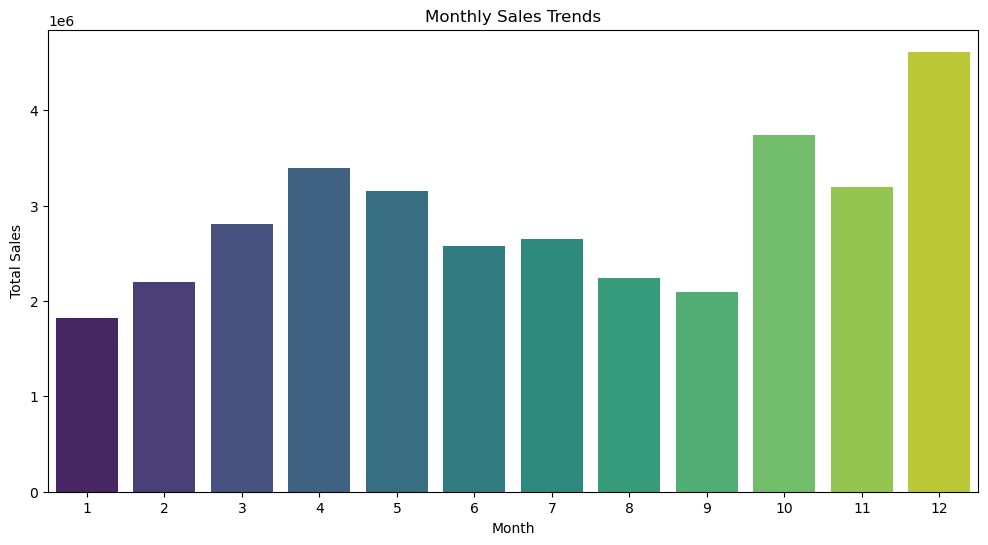

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Convert numeric month to month names
all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_name[x])

# Monthly Sales Trends using a Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [46]:
all_data.info()#1^e6 is on the top right of the graph so adjust accordingly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Day_of_Week       185686 non-null  object        
 7   Month             185686 non-null  object        
 8   Total Sales       185686 non-null  float64       
 9   City              185686 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 15.6+ MB


In [40]:
all_data= all_data.drop_duplicates()#Drop all the duplicates

After analyzing the monthly sales, most of the sales come during the holidays in December while January was clearly the lowest. This information can help the business in their dynamic pricing schemes. Bundle deals for sale are the best option in December when you know the customers will flod in, and you can then rachet up the price in January when you are at a lowpoint. This trend represets how you're consumers beehave during the year so it can be used to the business's advantage.

In [50]:
pd.value_counts(all_data['City'])#Find the frequency of the city's ordering the majority of the time

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

<Axes: ylabel='City'>

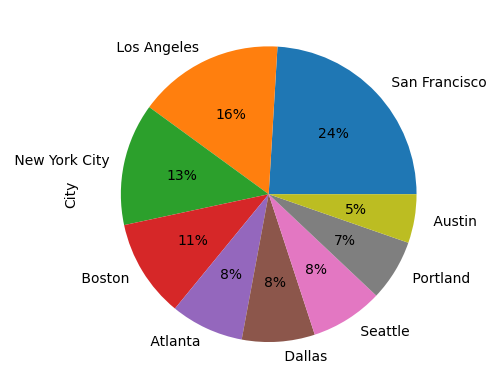

In [52]:
pd.value_counts(all_data['City']).plot(kind='pie', autopct='%1.0f%%')

Insight:
San Francisco, Los Angeles, and NYC collectively contribute to over 50% of our sales, making them the top-performing markets.

Strategic Actions:

Targeted Advertising:
Leverage this insight for targeted advertising campaigns tailored to the consumers in these key cities. Craft marketing messages that resonate with the preferences and trends specific to each location.

Localized Promotions:
Design promotions and special offers that cater to the unique needs and interests of customers in San Francisco, Los Angeles, and NYC. Understanding the local culture and consumer behaviors can help tailor promotions effectively.

Inventory Optimization:
Adjust inventory levels based on the demand patterns in these major markets. Ensure that popular products are well-stocked to meet the high demand, optimizing the supply chain for efficiency.

Partnerships and Collaborations:
Explore partnerships with local businesses or influencers in these cities to enhance brand visibility. Collaborative efforts can tap into the local networks and boost brand recognition.

Customer Engagement Events:
Organize events or experiences in these cities to foster a sense of community among customers. This can include product launches, exclusive previews, or interactive sessions that strengthen the brand-consumer relationship.

Data Refinement:
Continuously analyze customer data from these cities to refine your understanding of their preferences. Use this refined data to further tailor products and services, creating a personalized experience for customers in these markets.

Social Media Localization:
Customize social media content to reflect the cultural nuances and trends of each city. Engage with the local community on social platforms, encouraging user-generated content and building a sense of belonging.

Customer Feedback Initiatives:
Actively seek feedback from customers in San Francisco, Los Angeles, and NYC to understand their evolving needs. Use this feedback loop to adapt and innovate, staying ahead of market trends.

By strategically aligning marketing efforts, inventory management, and customer engagement with the unique characteristics of these top-performing markets, we can maximize our impact and foster sustainable growth in these key cities.

In [55]:
all_data.groupby('Product')['Quantity Ordered'].sum().nlargest(18)

Product
AAA Batteries (4-pack)        30986.0
AA Batteries (4-pack)         27615.0
USB-C Charging Cable          23931.0
Lightning Charging Cable      23169.0
Wired Headphones              20524.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
27in FHD Monitor               7541.0
iPhone                         6847.0
27in 4K Gaming Monitor         6239.0
34in Ultrawide Monitor         6192.0
Google Phone                   5529.0
Flatscreen TV                  4813.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
20in Monitor                   4126.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
Name: Quantity Ordered, dtype: float64

In [57]:
# Assuming 'Quantity Ordered' and 'Price Each' are already numeric columns
top_products_data = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).nlargest(18, 'Quantity Ordered')

# Resetting index for better structure
top_products_data = top_products_data.reset_index()

top_products_data

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),30986.0,2.99
1,AA Batteries (4-pack),27615.0,3.84
2,USB-C Charging Cable,23931.0,11.95
3,Lightning Charging Cable,23169.0,14.95
4,Wired Headphones,20524.0,11.99
5,Apple Airpods Headphones,15637.0,150.00
6,Bose SoundSport Headphones,13430.0,99.99
7,27in FHD Monitor,7541.0,149.99
8,iPhone,6847.0,700.00
9,27in 4K Gaming Monitor,6239.0,389.99


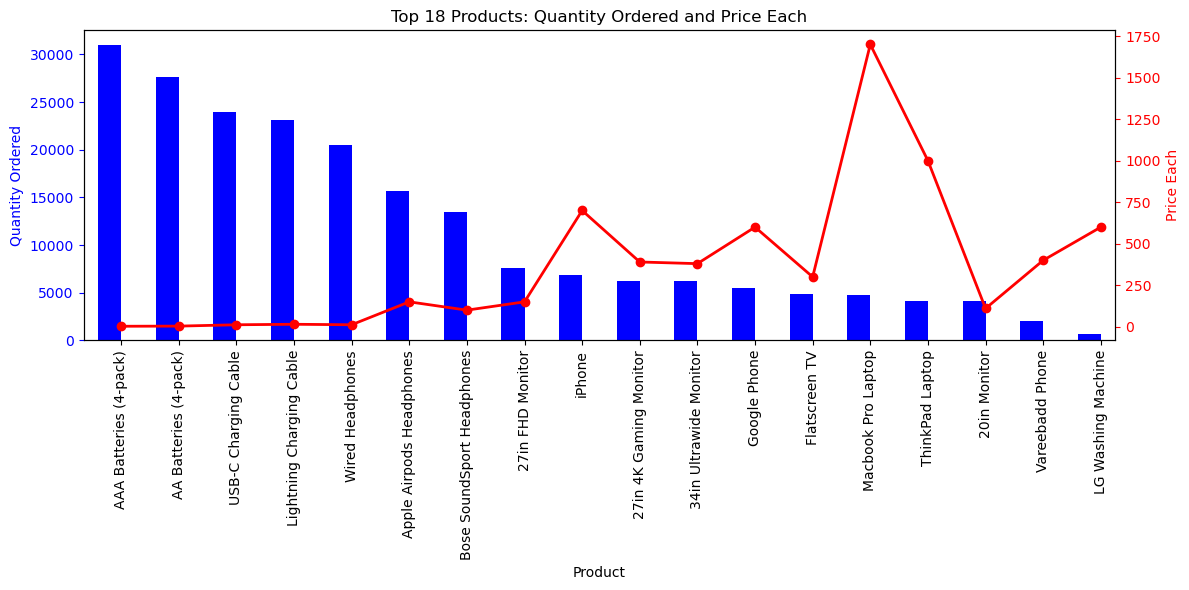

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Quantity Ordered' and 'Price Each' are already numeric columns
top_products_data = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).nlargest(18, 'Quantity Ordered')

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'Quantity Ordered' as a bar chart on the primary y-axis
top_products_data['Quantity Ordered'].plot(kind='bar', ax=ax1, color='b', position=1, width=0.4)

# Set labels and ticks for the primary y-axis
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.tick_params(axis='y', colors='b')
ax1.set_xticklabels(top_products_data.index, rotation=90, ha='center')

# Create a secondary y-axis for 'Price Each' as a line chart
ax2 = ax1.twinx()
top_products_data['Price Each'].plot(kind='line', ax=ax2, color='r', marker='o', linewidth=2)

# Set labels and ticks for the secondary y-axis
ax2.set_ylabel('Price Each', color='r')
ax2.tick_params(axis='y', colors='r')

# Title
plt.title('Top 18 Products: Quantity Ordered and Price Each')

# Show the plot
plt.tight_layout()
plt.show()


The cheaper the price the more quantity is ordered as it's a standard behaviour of consumers, however the 27in FHD Monitor and the 20in Monitor are being severly undervalued as the quantity exceeds the price. There is a potential for some profit if you increase the prices while the quantity wouldn't differ much in that range. The Macbook Laptop and the LG washing machine can benefit from a potential discount as there is a huge gap in between the prices and quantity. The ideal scenario is to have the prices slightly over the bar graph to maximize revenue.

# Product Trends

In [78]:
all_data['Product'].value_counts()[0:5].index#indexes of the 5 most frequently bought products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [79]:
most_sold_product=all_data['Product'].value_counts()[0:5].index#Store them 5 most sold products in a variable

In [80]:
all_data['Product'].isin(most_sold_product)# Know we get True for every row contaning a most sold product using a filter

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [81]:
all_data[all_data['Product'].isin(most_sold_product)]#Use this filter to display only the most sold products in the original df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day_of_Week,Month,Total Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Friday,April,23.90,Dallas
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Friday,April,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Tuesday,April,11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",Monday,April,11.95,San Francisco
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",Friday,April,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1.0,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",Sunday,September,2.99,Dallas
186842,259350,USB-C Charging Cable,1.0,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Monday,September,11.95,San Francisco
186844,259352,USB-C Charging Cable,1.0,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",Saturday,September,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Tuesday,September,8.97,Los Angeles


In [89]:
most_sold_product_df= all_data[all_data['Product'].isin(most_sold_product)]#Store the filtered version of the df to create a Pivot Table
most_sold_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day_of_Week,Month,Total Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Friday,April,23.90,Dallas
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Friday,April,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Tuesday,April,11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",Monday,April,11.95,San Francisco
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",Friday,April,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1.0,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",Sunday,September,2.99,Dallas
186842,259350,USB-C Charging Cable,1.0,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Monday,September,11.95,San Francisco
186844,259352,USB-C Charging Cable,1.0,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",Saturday,September,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Tuesday,September,8.97,Los Angeles


In [96]:
x=pd.crosstab(pd.Categorical(most_sold_product_df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True), most_sold_product_df['Product'])

<Axes: xlabel='row_0'>

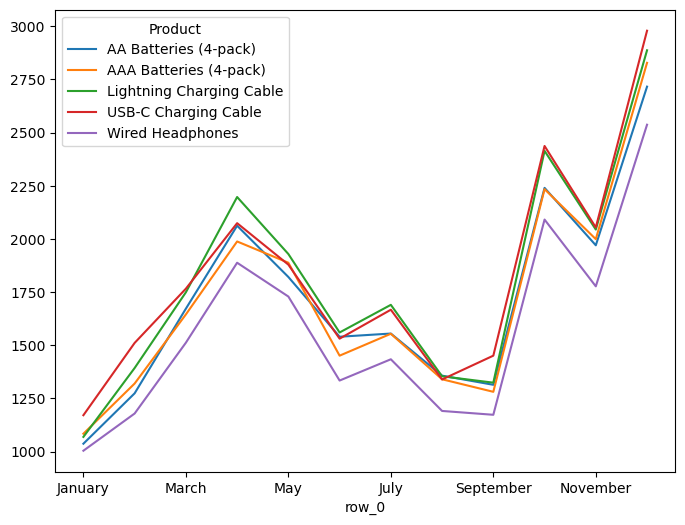

In [101]:
x.plot(figsize=(8,6))

After asking what is the trend of the most sold product, we get our answer above. This graph directly resembles our first bar chart which represented the Monthly Sales Trends.  We can conlude that the decisions made on about the advertisment, costs and distribution of these 5 products are significantly more valuable than any other decisions. This e-commerce brand relies heavily on the success of these 5 to make profits and can not afford a setback in any of these. Over 60% of the sales comes from these 5 products in the line chart making this line the most important to advertise and to create more efficient ways of production.

In [109]:

# Assuming 'all_data' is the original DataFrame
# Create a new DataFrame df_2 as a copy of all_data
df_2 = all_data.copy()

# Create a 'Grouped_products' column in df_2
df_2['Grouped_products'] = df_2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate rows based on 'Order ID' to keep only unique order groups
df_2.drop_duplicates(subset='Order ID', keep='first', inplace=True)

# Display the DataFrame with the new 'Grouped_products' column
print(df_2[['Order ID', 'Grouped_products']])

       Order ID               Grouped_products
0        176558           USB-C Charging Cable
2        176559     Bose SoundSport Headphones
3        176560  Google Phone,Wired Headphones
5        176561               Wired Headphones
6        176562           USB-C Charging Cable
...         ...                            ...
186845   259353         AAA Batteries (4-pack)
186846   259354                         iPhone
186847   259355                         iPhone
186848   259356         34in Ultrawide Monitor
186849   259357           USB-C Charging Cable

[178437 rows x 2 columns]


In [110]:
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day_of_Week,Month,Total Sales,City,Grouped_products
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Friday,April,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sunday,April,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Friday,April,600.00,Los Angeles,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Tuesday,April,11.99,Los Angeles,Wired Headphones
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",Monday,April,11.95,San Francisco,USB-C Charging Cable


In [115]:
df_2['Grouped_products'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone,Wired Headphones', 'Wired Headphones',
       'Macbook Pro Laptop', 'Google Phone', 'Lightning Charging Cable',
       '27in 4K Gaming Monitor', 'AA Batteries (4-pack)',
       'Apple Airpods Headphones', 'Google Phone,USB-C Charging Cable',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       'AAA Batteries (4-pack),Google Phone', '27in FHD Monitor',
       '20in Monitor', 'LG Dryer', 'ThinkPad Laptop', 'Vareebadd Phone',
       'LG Washing Machine', '34in Ultrawide Monitor',
       'Lightning Charging Cable,USB-C Charging Cable',
       'Apple Airpods Headphones,ThinkPad Laptop',
       'Bose SoundSport Headphones,AAA Batteries (4-pack)',
       '34in Ultrawide Monitor,Google Phone',
       'iPhone,Lightning Charging Cable',
       'Google Phone,Bose SoundSport Headphones,Wired Headphones',
       'AAA Batteries (4-pack),27in FHD Monitor',
       'USB-C Charging Cable,AAA Batteries (4-pack

<Axes: ylabel='Grouped_products'>

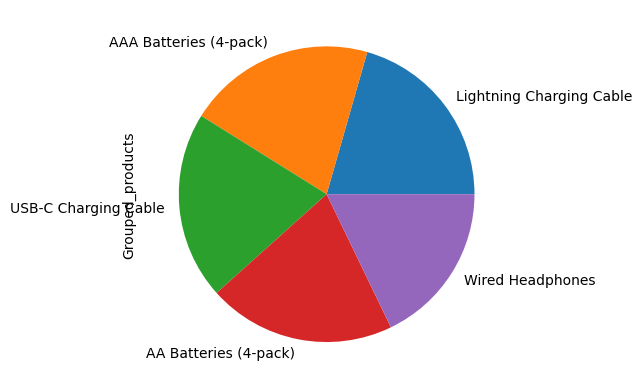

In [112]:
df_2['Grouped_products'].value_counts()[0:5].plot.pie()

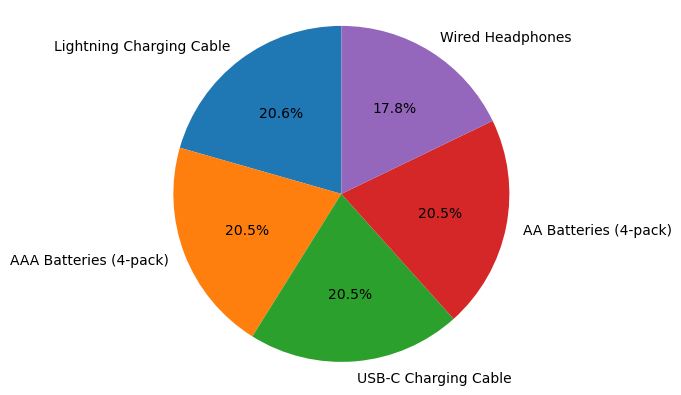

In [114]:

# Assuming df_2 is the DataFrame with 'Grouped_products' column
top5_products = df_2['Grouped_products'].value_counts().nlargest(5)

# Plotting the pie chart
top5_products.plot.pie(autopct='%1.1f%%', startangle=90, title='', ylabel='')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: ylabel='Grouped_products'>

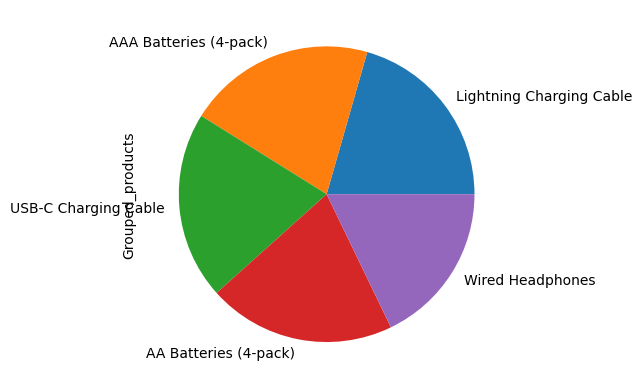

In [116]:
df_2['Grouped_products'].value_counts()[0:5].plot.pie()